In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


GARCH model parameters

mu -0.000619
omega 3e-06
alpha 0.1069
beta 0.8812
long-run volatility 0.0147
log-likelihood 7321.934


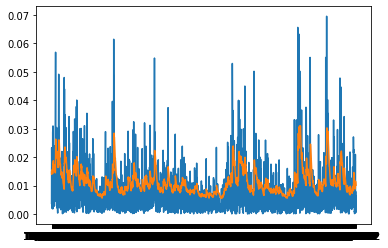

In [ ]:
#specifying the sample
vnindex = pd.read_csv('TOR.csv').set_index('Date')
Price = pd.read_csv('TOR.csv').set_index('Date')
Price = Price['VNINDEXPriceUSD']
vnindex_return = np.log(vnindex['VNINDEXPriceUSD']).diff().dropna() # log return of S&P500 index
vnindex_return = vnindex_return.iloc[::-1] # the latest data should come first
#starting parameter values - sample mean and variance
mean = np.average(vnindex_return)
var = np.std(vnindex_return)**2
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = vnindex_return - mu
    realised = abs(resid)
    conditional = np.zeros(len(vnindex_return))
    conditional[0] =  long_run
    for t in range(1,len(vnindex_return)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = vnindex_return - mu
realised = abs(resid)
conditional = np.zeros(len(vnindex_return))
conditional[0] =  long_run
for t in range(1,len(vnindex_return)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(Price.index[1:],realised)
plt.plot(Price.index[1:],conditional)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


GARCH model parameters

mu -0.002192
omega 0.000148
alpha 0.206
beta 0.7781
long-run volatility 0.0966
log-likelihood 3720.76


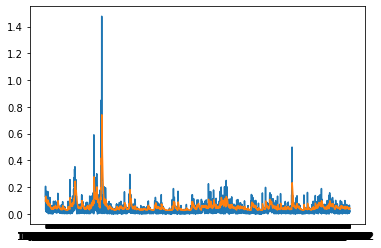

In [ ]:
#specifying the sample
bitcoin = pd.read_csv('TOR.csv').set_index('Date')
Price = pd.read_csv('TOR.csv').set_index('Date')
Price = Price['BitcoinPrice']
BitcoinPrice = np.log(vnindex['BitcoinPrice']).diff().dropna() # log return of S&P500 index
BitcoinPrice = BitcoinPrice.iloc[::-1] # the latest data should come first
#starting parameter values - sample mean and variance
mean = np.average(BitcoinPrice)
var = np.std(BitcoinPrice)**2
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = BitcoinPrice - mu
    realised = abs(resid)
    conditional = np.zeros(len(BitcoinPrice))
    conditional[0] =  long_run
    for t in range(1,len(BitcoinPrice)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = BitcoinPrice - mu
realised = abs(resid)
conditional = np.zeros(len(BitcoinPrice))
conditional[0] =  long_run
for t in range(1,len(BitcoinPrice)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(Price.index[1:],realised)
plt.plot(Price.index[1:],conditional)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


GARCH model parameters

mu -0.001704
omega 1.8e-05
alpha 0.1329
beta 0.8178
long-run volatility 0.0193
log-likelihood 6220.45


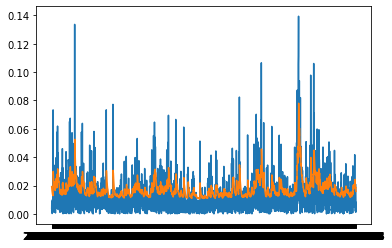

In [ ]:
#specifying the sample
AAPL = pd.read_csv('TOR.csv').set_index('Date')
Price = pd.read_csv('TOR.csv').set_index('Date')
Price = Price['AAPLPrice']
AAPLPrice = np.log(AAPL['AAPLPrice']).diff().dropna() # log return of S&P500 index
AAPLPrice = AAPLPrice.iloc[::-1] # the latest data should come first
#starting parameter values - sample mean and variance
mean = np.average(AAPLPrice)
var = np.std(AAPLPrice)**2
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = AAPLPrice - mu
    realised = abs(resid)
    conditional = np.zeros(len(AAPLPrice))
    conditional[0] =  long_run
    for t in range(1,len(AAPLPrice)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = AAPLPrice - mu
realised = abs(resid)
conditional = np.zeros(len(AAPLPrice))
conditional[0] =  long_run
for t in range(1,len(AAPLPrice)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(Price.index[1:],realised)
plt.plot(Price.index[1:],conditional)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


GARCH model parameters

mu -0.001406
omega 2.9e-05
alpha 0.1745
beta 0.7258
long-run volatility 0.0169
log-likelihood 6491.525


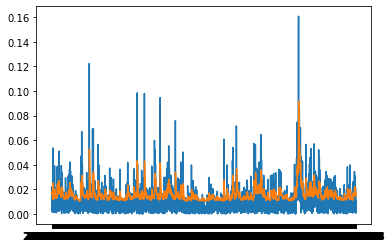

In [ ]:
#specifying the sample
MSFT = pd.read_csv('TOR.csv').set_index('Date')
Price = pd.read_csv('TOR.csv').set_index('Date')
Price = Price['MSFTPrice']
MSFTPrice = np.log(MSFT['MSFTPrice']).diff().dropna() # log return of S&P500 index
MSFTPrice = MSFTPrice.iloc[::-1] # the latest data should come first
#starting parameter values - sample mean and variance
mean = np.average(MSFTPrice)
var = np.std(MSFTPrice)**2
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = MSFTPrice - mu
    realised = abs(resid)
    conditional = np.zeros(len(MSFTPrice))
    conditional[0] =  long_run
    for t in range(1,len(MSFTPrice)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = MSFTPrice - mu
realised = abs(resid)
conditional = np.zeros(len(MSFTPrice))
conditional[0] =  long_run
for t in range(1,len(MSFTPrice)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(Price.index[1:],realised)
plt.plot(Price.index[1:],conditional)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


GARCH model parameters

mu -0.000929
omega 3.6e-05
alpha 0.1443
beta 0.7281
long-run volatility 0.0167
log-likelihood 6424.1002


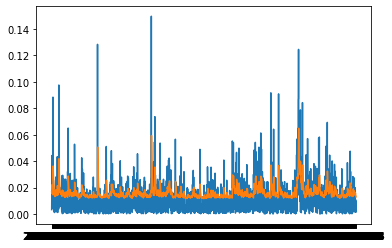

In [ ]:
#specifying the sample
GOOGL = pd.read_csv('TOR.csv').set_index('Date')
Price = pd.read_csv('TOR.csv').set_index('Date')
Price = Price['GOOGLPrice']
GOOGLPrice = np.log(GOOGL['GOOGLPrice']).diff().dropna() # log return of S&P500 index
GOOGLPrice = GOOGLPrice.iloc[::-1] # the latest data should come first
#starting parameter values - sample mean and variance
mean = np.average(GOOGLPrice)
var = np.std(GOOGLPrice)**2
def garch_mle(params):
    #specifying model parameters
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    #calculating long-run volatility
    long_run = (omega/(1 - alpha - beta))**(1/2)
    #calculating realised and conditional volatility
    resid = GOOGLPrice - mu
    realised = abs(resid)
    conditional = np.zeros(len(GOOGLPrice))
    conditional[0] =  long_run
    for t in range(1,len(GOOGLPrice)):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    #calculating log-likelihood
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    log_likelihood = np.sum(np.log(likelihood))
    return -log_likelihood
#maximising log-likelihood
res = spop.minimize(garch_mle, [mean, var, 0, 0], method='Nelder-Mead')
#retrieving optimal parameters
params = res.x
mu = res.x[0]
omega = res.x[1]
alpha = res.x[2]
beta = res.x[3]
log_likelihood = -float(res.fun)
#calculating realised and conditional volatility for optimal parameters
long_run = (omega/(1 - alpha - beta))**(1/2)
resid = GOOGLPrice - mu
realised = abs(resid)
conditional = np.zeros(len(GOOGLPrice))
conditional[0] =  long_run
for t in range(1,len(GOOGLPrice)):
    conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
#printing optimal parameters
print('GARCH model parameters')
print('')
print('mu '+str(round(mu, 6)))
print('omega '+str(round(omega, 6)))
print('alpha '+str(round(alpha, 4)))
print('beta '+str(round(beta, 4)))
print('long-run volatility '+str(round(long_run, 4)))
print('log-likelihood '+str(round(log_likelihood, 4)))
#visualising the results
plt.figure(1)
plt.rc('xtick', labelsize = 10)
plt.plot(Price.index[1:],realised)
plt.plot(Price.index[1:],conditional)
plt.show()